In [1]:
# Importing  relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import  train_test_split as tts
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score,classification_report

 ## Loading the data

In [2]:
train_loan_df = pd.read_csv("C:/Users/adm/Documents/Datasets/loan eligibility/loan-train.csv")
test_loan_df = pd.read_csv("C:/Users/adm/Documents/Datasets/loan eligibility/loan-test.csv")

In [6]:
train_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print('Rows:{0} \n columns: {1}'.format(train_loan_df.shape[0],train_loan_df.shape[1]))

Rows:614 
 columns: 13


In [8]:
# Understanding the data 
train_loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
train_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
train_loan_df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [4]:
# Dropping loan Id which has no any significance in the anlysis
df = train_loan_df.drop('Loan_ID',axis = 1)
test_df =  test_loan_df.drop("Loan_ID",axis = 1)

In [10]:
df.Loan_Status.describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

### Mapping 'Y' and 'N' as 0

In [5]:
df.Loan_Status = df.Loan_Status.map({'Y':1, 'N':0})

In [5]:
df.Loan_Status.describe()

count    614.000000
mean       0.687296
std        0.463973
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Loan_Status, dtype: float64

In [7]:
# Changing credit History's data type as object as there are only two values '0' and '1'
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [7]:
df['Credit_History'].loc[df.Credit_History == 1.0]='one'
df['Credit_History'].loc[df.Credit_History == 0.0]='zero'

test_df['Credit_History'].loc[df.Credit_History == 1.0]='one'
test_df['Credit_History'].loc[df.Credit_History == 0.0]= 'zero'

In [9]:
df['Credit_History'].describe()

count     564
unique      2
top       one
freq      475
Name: Credit_History, dtype: object

## Univariate Analysis

In [8]:
cat_cols = df.select_dtypes('object').columns 
num_cols = df.select_dtypes(['int64', 'float64']).columns

In [11]:
print(cat_cols)
print(num_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status'],
      dtype='object')


#### Count plots for  categorical columns and histograms for numerical colulmns

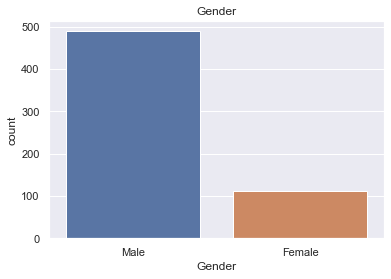

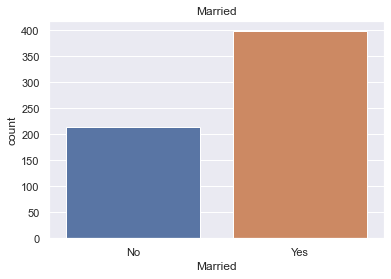

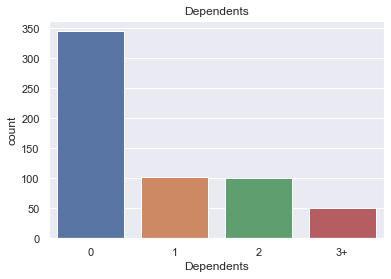

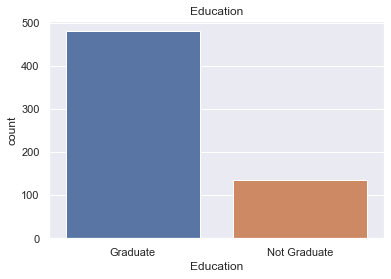

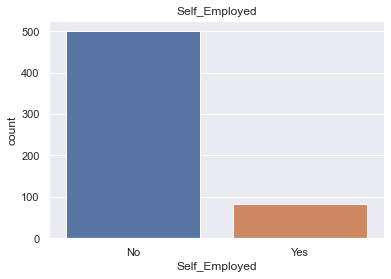

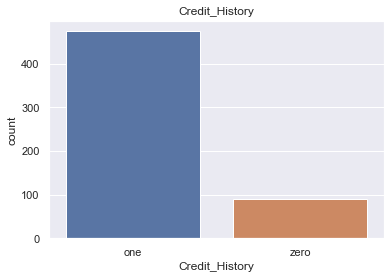

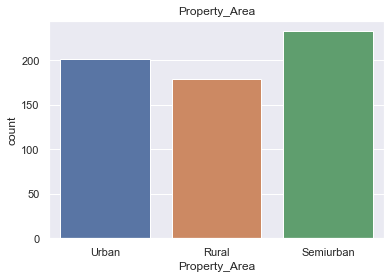

In [36]:
for col in cat_cols: 
    sns.countplot(df[col])
    plt.title(col)
    plt.show()
    print('\n\n')

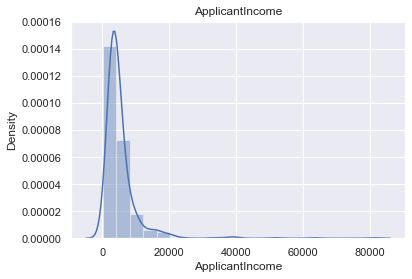

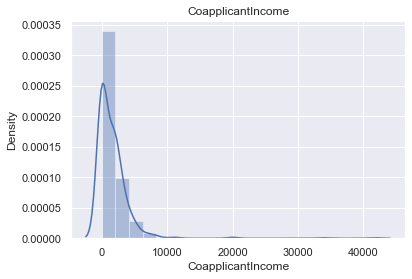

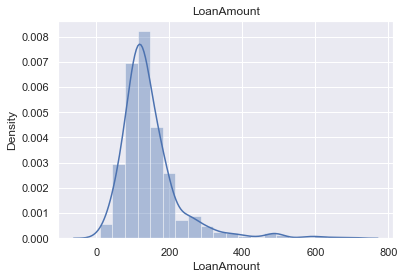

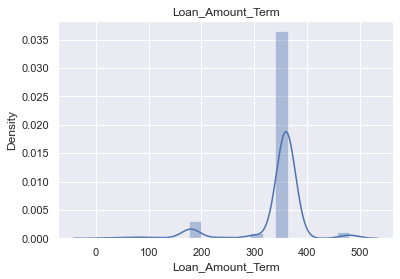

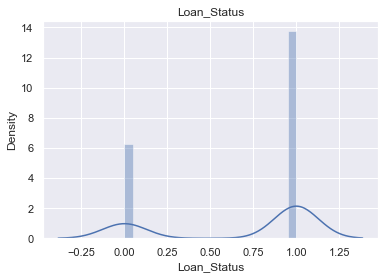

In [37]:
 for col in num_cols:
        sns.distplot(df[col],bins =20)
        plt.title(col)
        plt.show()
        print('\n\n')

## Bivariate Analysis

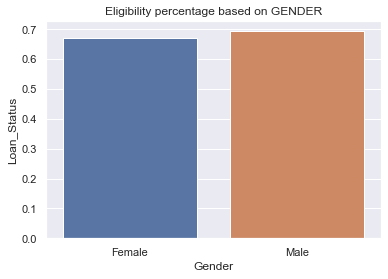

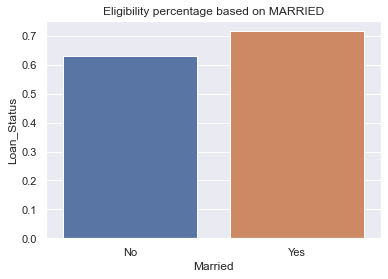

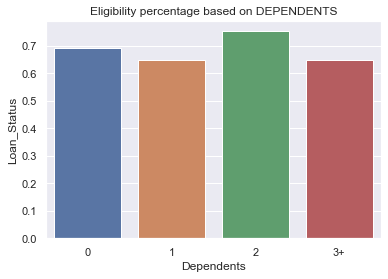

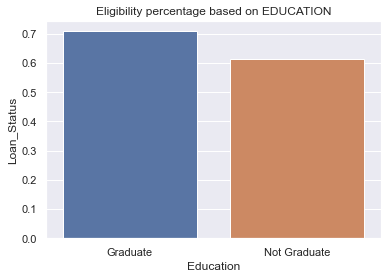

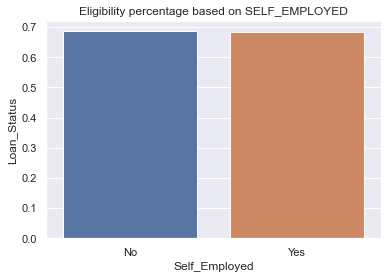

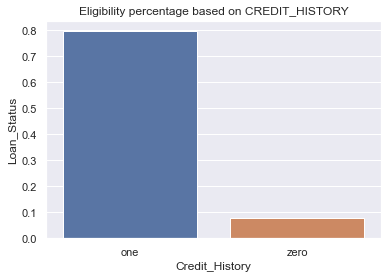

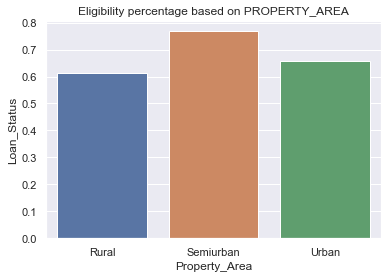

In [9]:
# Plotting BAR PLOTS for categorical data.
for col in cat_cols:
    sns.barplot(data = df.groupby(col)['Loan_Status'].mean().reset_index(), x = col, y = 'Loan_Status')
    plt.title('Eligibility percentage based on '+ col.upper())
    plt.show()
    print('\n\n')

## From the above graphing we can conclude that;
* Male as a slightly higher chance to be eligable for a loan
* Married people have more chances for being elegible for a loan.
* People with two or more dependents have more chances than people with more than 3 dependents.
* Graduate individual has more chances of getting approval.
* Self employes or not , both have similar chance of getting approval.
* People living in semi urban area are more likely to get approval.
* People with a credit history are more likely to get approval.

In [10]:
for i in num_cols:
    if i !='Loan_Status':
        print(df.groupby('Loan_Status')[i].median().reset_index())
        print('\n\n')

   Loan_Status  ApplicantIncome
0            0           3833.5
1            1           3812.5



   Loan_Status  CoapplicantIncome
0            0              268.0
1            1             1239.5



   Loan_Status  LoanAmount
0            0       129.0
1            1       126.0



   Loan_Status  Loan_Amount_Term
0            0             360.0
1            1             360.0





**we can conclude that**
* The median Applicant income of eligible candidate is 3812.5
* The median coapplicant income of eligible candidates is 1239.5
* The median laon amount for eligible candidates is 126.0
* The median loan amount term of eligible candidates is 360.0

### Dealing with missing values

In [10]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Filling numerical data with median and categorical data with mode**

In [11]:
for col in num_cols:
    df[col].fillna(df[col].median(),inplace = True)

df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
for col in cat_cols:
    print(col,df[col].mode())
    


Gender 0    Male
dtype: object
Married 0    Yes
dtype: object
Dependents 0    0
dtype: object
Education 0    Graduate
dtype: object
Self_Employed 0    No
dtype: object
Credit_History 0    one
dtype: object
Property_Area 0    Semiurban
dtype: object


In [9]:
test_df.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
df.Gender.fillna('Male', inplace = True)
df.Married.fillna('Yes',inplace = True)
df.Dependents.fillna('0', inplace = True)
df.Self_Employed.fillna('No', inplace = True)


test_df.Gender.fillna('Male',inplace = True)
test_df.Dependents.fillna('0',inplace = True)
test_df.Self_Employed.fillna('No', inplace = True)
test_df.fillna(test_df.LoanAmount.median(), inplace =  True)
test_df.fillna(test_df.Loan_Amount_Term.median(),inplace = True)

### Filling credit history with 'na'

In [14]:
df.Credit_History.fillna('na', inplace = True)

test_df.Credit_History.fillna('na', inplace = True)

In [18]:
df.shape

(614, 12)

In [12]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Balancing the dataset

Imbalanced data usually reflects unequal distribution of classes within a dataset.
Some of the techniques of solving  this problem are;
* Resampling ( undersampling and undersampling).
** undersampling is the process of randomly deleting some of the observations from the majority class.

In [15]:
loan_1 = df.loc[df.Loan_Status == 1].sample(192, random_state = 0)
loan_0 = df.loc[df.Loan_Status == 0]

data = pd.concat([loan_1,loan_0], axis = 0)

In [16]:
balanced_data = data.reset_index(drop = True)

In [17]:
X = balanced_data.drop('Loan_Status', axis = 1)
y = balanced_data['Loan_Status']

x_test = test_df

### scaling data

If data in any  condition has points so far from each other scaling is a technique to make them closer.Scaling is used to make data points generalized so that the distance between them will be lower.

When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?

The answer to this problem is scaling. A common method we will use here is *standardization*

In [18]:
num_cols = X.select_dtypes(['int64','float64']).columns
scaler = StandardScaler()
scaled_data =  scaler.fit_transform(X[num_cols])

scaled_test = scaler.fit_transform(x_test[num_cols])

#### Encoding categorical columns

In [19]:
cat_cols = X.select_dtypes('object').columns
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse =  False)
encoded_data  = encoder.fit_transform(X[cat_cols])

encoded_test = encoder.fit_transform(test_df[cat_cols])

In [20]:
scaled_X=  pd.DataFrame(scaled_data, columns = num_cols)
encoded_X = pd.DataFrame(encoded_data, columns = encoder.get_feature_names())
X_preprocessed = pd.concat([scaled_X],axis = 1)

scaled_X_test = pd.DataFrame(scaled_test, columns = num_cols)
encoded_X_test = pd.DataFrame(encoded_test, columns = encoder.get_feature_names())
X_test_preprocessed = pd.concat([scaled_X_test, encoded_X_test], axis = 1)



In [21]:
X_preprocessed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,-0.356616,-0.071917,-0.598759,0.268285
1,-0.422439,-0.001589,-0.459770,0.268285
2,-0.260236,-0.071917,-0.031218,0.268285
3,-0.437641,0.844678,0.339420,0.268285
4,0.276842,-0.497677,-0.309197,0.268285
...,...,...,...,...
379,0.152644,-0.205861,0.466828,0.268285
380,-0.363608,-0.497677,-0.679836,0.268285
381,-0.754446,11.661432,2.354769,-2.447570
382,-0.452843,0.611225,-0.216538,-2.447570


#### Splitting the data into training and validation data

In [22]:
x_train, x_valid, y_train, y_valid = tts(X_preprocessed,y ,test_size = 0.1, random_state = 0 , stratify = y)

 tts is train test split
Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.

We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

## Model Selection

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 

model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(x_train, y_train)

model_lr = LogisticRegression(max_iter = 250)
model_lr.fit(x_train, y_train)

model_svm = svm.SVC(kernel = 'linear', random_state =  0)
model_svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

## Model Evaluation

In [24]:
preds_lr = model_lr.predict(x_valid)
preds_rf = model_rf.predict(x_valid)
preds_sv = model_svm.predict(x_valid)


In [35]:
print('Accuracy score for Logistic regression : {1}\nF1 score for Logistic regression'.format (accuracy_score(preds_lr, y_valid), f1_score(preds_lr, y_valid)))

Accuracy score for Logistic regression : 0.5500000000000002
F1 score f or Logistic regression


In [38]:
print('Accuracy score for Random_Forest {1}\nF1 score for Random Forest: {1}'.format(accuracy_score(preds_rf, y_valid ), f1_score(preds_rf,y_valid)))

Accuracy score for Random_Forest 0.4864864864864865
F1 score for Random Forest: 0.4864864864864865


In [41]:
print('Accuracy score for  SVM {1}'.format(accuracy_score(preds_sv,y_valid),f1_score(preds_sv,y_valid)))

Accuracy score for  SVM 0.5660377358490566


### Determining the optimal max_depth for RANDOM FOREST

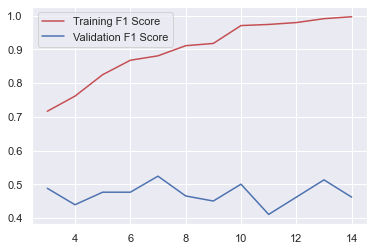

In [27]:
f1score_train = []
f1score_valid = []

depth = range (3,15)

for i in  depth:
    model = RandomForestClassifier(max_depth = i , n_estimators = 25 , random_state = 0)
    model.fit(x_train,y_train)
    
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    
    
    f1score_train.append(f1_score(train_preds,y_train))
    f1score_valid.append(f1_score(valid_preds,y_valid))

plt.plot(depth, f1score_train,color = 'r')
plt.plot(depth,f1score_valid, color = 'b')
plt.legend(['Training F1 Score','Validation F1 Score'])


#### Final Model

In [28]:
final_model = RandomForestClassifier(max_depth = 5 , n_estimators = 25, random_state = 0 )
final_model.fit(x_train , y_train)
preds = final_model.predict(x_valid)

In [29]:
print('Accuracy score for final model : {0}\nF1 score for final model:{1}'.format(accuracy_score(preds,y_valid),f1_score(preds,y_valid)))

Accuracy score for final model : 0.4358974358974359
F1 score for final model:0.47619047619047616


In [30]:
print(classification_report(preds, y_valid))

              precision    recall  f1-score   support

           0       0.35      0.44      0.39        16
           1       0.53      0.43      0.48        23

    accuracy                           0.44        39
   macro avg       0.44      0.44      0.43        39
weighted avg       0.45      0.44      0.44        39



## Deploying the Model

Deployment is the process by which a ML model is moved from an offline environment and integrated into an existing production environment, such as a live application.

In [36]:
import pickle
# save model to disk
filename = 'model.pkl'
pickle.dump(final_model, open(filename, 'wb'))# means write as binary

### To read the model from file

In [37]:
# load  the  model from disk
loaded_model = pickle.load(open(filename, 'rb'))
preds = loaded_model.predict(x_valid)

In [38]:
print('Accuracy score: {0}\nF 1 score: {1}'. format(accuracy_score(preds,y_valid),f1_score(preds,y_valid)))

Accuracy score: 0.4358974358974359
F 1 score: 0.47619047619047616
